# Linear Models for Classification and Regression

This notebook provides examples of using sklearn to create a linear regression model and a logistic regression model.

## Linear Regression

### Energy efficiency Data Set

#### Data Set Information:

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


#### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses. 

#### Specifically: 
1. X1	Relative Compactness 
1. X2	Surface Area 
1. X3	Wall Area 
1. X4	Roof Area 
1. X5	Overall Height 
1. X6	Orientation 
1. X7	Glazing Area 
1. X8	Glazing Area Distribution 
1. y1	Heating Load 
1. y2	Cooling Load


In [2]:
import pandas as pd

In [4]:
# read CSV file directly from a URL and save the results
data = pd.read_csv('ENB2012_data.csv')

# display the first 5 rows
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
data.shape

(768, 10)

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


In [5]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

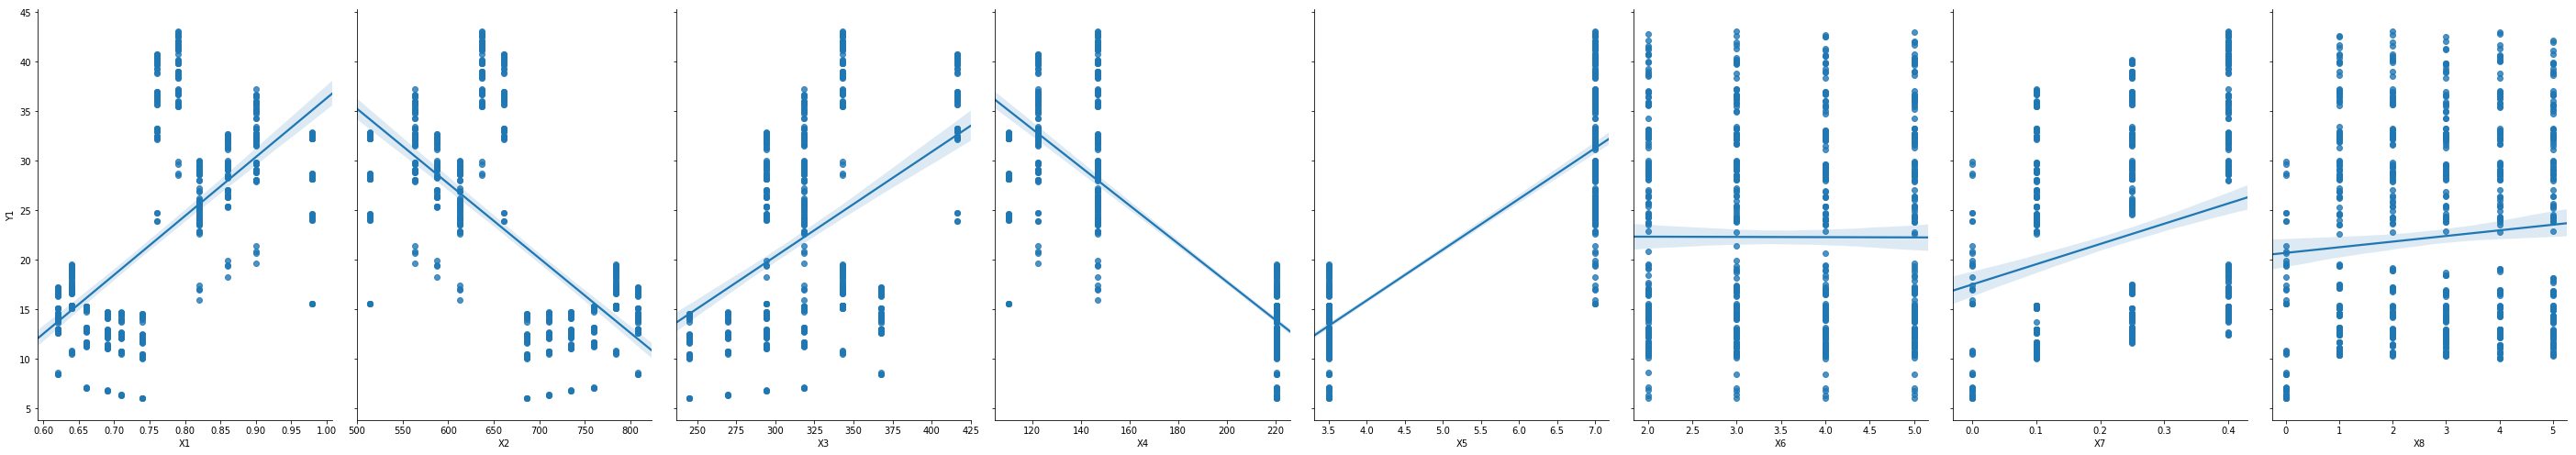

In [6]:
# visualize the relationship between the features and the response using scatterplots
# we will just examine Y1 (heating load)
sns.pairplot(data, x_vars=['X1','X2','X3','X4','X5','X6','X7','X8'], y_vars='Y1', size=7, aspect=0.7, kind='reg')

Form of linear regression
$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

$y$ is the response
$\beta_0$ is the intercept
$\beta_1$ is the coefficient for $x_1$ (the first feature)
$\beta_n$ is the coefficient for $x_n$ (the nth feature)
In this case:

$y = \beta_0 + \beta_1 \times X_1 + \beta_2 \times X_2 + \beta_3 \times X_3 \ldots $

The $\beta$ values are called the model coefficients. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions.

### Using scikit-learn for regression
1. scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
1. As pandas is built with NumPy, X can be a Pandas DataFrame and y can be a Pandas Series.

#### Features X

In [7]:
# create a Python list of feature names
feature_cols = ['X1','X2','X3','X4','X5','X6','X7','X8']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [8]:
# check the type and shape of X
# the shape is a tuple (number of rows, number of columns)
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(768, 8)


#### Target Y

In [9]:
# select the targe Series from the DataFrame
y = data['Y1']

# equivalent command that works if there are no spaces in the column name
y = data.Y1

# print the first 5 values
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Y1, dtype: float64

In [10]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(768,)


### Test and Training Data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


### Model fitting with least squares regression

In [15]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Viewing the model

In [16]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

84.66250762686172
[-6.44669761e+01 -6.35900007e-02  3.63020618e-02 -4.99460312e-02
  4.08500143e+00  2.14789972e-02  2.00204615e+01  2.39277149e-01]


In [17]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('X1', -64.46697609952915),
 ('X2', -0.06359000068670838),
 ('X3', 0.03630206179576924),
 ('X4', -0.049946031242658895),
 ('X5', 4.085001434668553),
 ('X6', 0.0214789971857271),
 ('X7', 20.020461488133105),
 ('X8', 0.23927714892361818)]

And the model we have fitted is therefore as follows:

$$y = 84.66 - 64.45 \times X1 + \ldots + 0.23 \times X8$$

We can interpret as follows (among others):
1. The intercept is 84.66
1. Each unit increase of X1 results in a decrease in the target of 64.45 units
1. Each unit increase of X8 results in an increase in the target of 0.23 units

### Making predictions

In [18]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

### Evaluating model accuracy

Mean absolute error is the average absolute value of the difference between the predicted and actual values:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [22]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_pred,y_test))

2.3239361460652734


Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [20]:
print(metrics.mean_squared_error(y_test, y_pred))

10.507019038151808


Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
where $\hat{y}_i$ is the model predicted value of the target.

In [23]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3.241453229363615


Often $R^2$ is used to evaluate regression models by estimating the variation in the observed data that is able to be explained by the model. 

It is calculated as follows:

The mean of the observed data:
$$ \bar{y} = \frac 1n \sum_{i=1}^n y_i$$ 
The total sum of the squares (proportional to the variance):
$$ SS_{tot} = \sum_{i=1}^n (y_i-\bar{y}_i)^2 $$
The "residual" or unexplained sum of squares:
$$ SS_{res} = \sum_{i=1}^n (y_i-\hat{y}_i)^2 $$
And $R^2$ is calculated as follows:
$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

In [24]:
print(metrics.mean_squared_error(y_test, y_pred))

10.507019038151808


In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8963623310307529

We can interpret this to mean 89 percent of the variation in the target Y is explained by our model. 

Note that we will not spend long on $R^2$ as there are various problems with it due to assuming linear relationships (independent research task: look these up).

In addition, there is a large amount of issues in linear regression that we have not covered:

1. Detecting collinearity
1. Analusis of model fit (except R^2)
1. Transforming features to fit non-linear relationships
1. Interaction terms
1. Assumptions of linear regression
1. ...

## Advertising Data set

Observe the template that we followed in sklearn:

1. understand the data (at a minimum count the rows, check for outliers, data errors, plot the features against the target, consider if linear model is appropriate)
1. create attributes/features data structure
1. create the target column data structure
1. construct test and training data data structures
1. fit a model to the training data
1. determine performance of the model on the training data
1. evaluate the model on test data

You should also review the example provided in the sklearn documentation:
http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Now follow this methodology to do the following:
1. update the above analysis to predict the cooling load for buildings (Y1 is the heating load)
1. construct a linear model with the file Advertising.csv (target variable is sales)

# Logistic Regression

## Banking Dataset

#### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010)
1. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
1. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
1. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

#### Attribute Information:

#### Input variables:
#### bank client data:
1. age (numeric)
1. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
1. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
1. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
1. default: has credit in default? (categorical: 'no','yes','unknown')
1. housing: has housing loan? (categorical: 'no','yes','unknown')
1. loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
1. contact: contact communication type (categorical: 'cellular','telephone') 
1. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
1. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
1. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
1. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
1. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
1. previous: number of contacts performed before this campaign and for this client (numeric)
1. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
1. emp.var.rate: employment variation rate - quarterly indicator (numeric)
1. cons.price.idx: consumer price index - monthly indicator (numeric) 
1. cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
1. euribor3m: euribor 3 month rate - daily indicator (numeric)
1. nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
1. y - has the client subscribed a term deposit? (binary: 'yes','no')



### Read Data

In [29]:
data = pd.read_csv('bank.csv', header=0)
data = data.dropna()
print(data.shape)

(41188, 21)


### Data Understanding

In [30]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [31]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [32]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

### Data Preprocessing

In [33]:
# we will just use a subset of the data: 
# job, marital, default, housing, loan, campaign
data = data[['job','marital','default','housing','loan','campaign','poutcome','y']]
data.head()

,job,marital,default,housing,loan,campaign,poutcome,y
0,blue-collar,married,unknown,yes,no,1,nonexistent,0
1,technician,married,no,no,no,1,nonexistent,0
2,management,single,no,yes,no,3,success,1
3,services,married,no,no,no,2,nonexistent,0
4,retired,married,no,yes,no,1,success,1


In [34]:
num_positive =  sum(data['y']) 
num_negative = sum(data['y']==0) 
print (num_positive)
print (num_negative)

4640
36548


In [35]:
num_default = sum(data['default']=='no') 
num_no_default = sum (data['default']=='yes') 
num_unknown_default = sum (data['default']=='unknown') 

print (num_default)
print (num_no_default)
print (num_unknown_default)

32588
3
8597


Dummy variables are variables derrived from categorical variables to separate the categories into new columns. 

This also has converts categorical data into numeric information that can be utilised in the modelling functions.

We generate dummy variables for the categorical variables easily using pandas:

In [51]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan','poutcome'], drop_first=True)

In [38]:
data2.head()

,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_single,marital_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [39]:
data2.columns

Index(['campaign', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes',
       'loan_unknown', 'loan_yes', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Notice that some of the dummey variables are for the unknown category - these can be removed as contain no information:

In [52]:
data2 = data2.drop(columns=['job_unknown', 'marital_unknown','default_unknown','housing_unknown','loan_unknown'])

In [41]:
data2.columns

Index(['campaign', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'default_yes', 'housing_yes', 'loan_yes',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [42]:
data2.head()


,campaign,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success
0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
2,3,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
3,2,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
4,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1


In [44]:
# Target
y = data2['y']

# Features
# dummy variables were put after y previously so easiest to just delete y from data 2 to get 
# only feature variables, we also have to delete the original variables that are now represented
# in the new dummey variable columns
X = data2.drop(columns=['y'])

In [43]:
data2.columns

Index(['campaign', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'default_yes', 'housing_yes', 'loan_yes',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Check feature columns and target are ok

In [46]:
print (y.shape)
print (X.shape)
print (data2.shape)

(41188,)
(41188, 18)
(41188, 19)


#### Split into test and training data

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
X_train.shape

(30891, 18)

In [55]:
X_train.head()

,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,default_yes,housing_yes,loan_yes,poutcome_nonexistent,poutcome_success
10685,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
224,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
29638,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0
4804,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
11614,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [56]:
X_train.columns

Index(['campaign', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'default_yes', 'housing_yes', 'loan_yes',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [57]:
y_train.head()

10685    1
224      0
29638    0
4804     0
11614    0
Name: y, dtype: int64

In [61]:
print(X_test.shape)
print(X_train.shape)

(10297, 18)
(30891, 18)


### Learn the model

In [58]:
# import model
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression(random_state=0)

# fit the model to the training data (learn the coefficients)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
print(logreg.intercept_)
print(logreg.coef_)

[-1.5676211]
[[-0.09983704 -0.55759047 -0.3122807  -0.32488274 -0.09719285  0.78936909
  -0.15858819 -0.39799357  0.77300209 -0.2240053   0.07626108  0.01308026
   0.23985473 -0.01156874  0.01131437 -0.02490794 -0.44851605  2.23154986]]


And the model we have fitted is therefore as follows:

$$p_{yes}(\bar{x}) = \frac{1}{1 - e^{-1.567 - 0.090 \times campaign -0.56 \times job\_blue-collar \ldots} } $$

### Evaluation

In [62]:
# training
percent_correct = logreg.score(X_test, y_test)
print('Accuracy for test set: {:.2f}'.format(percent_correct))

Accuracy for test set: 0.90


In [63]:
y_pred = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)


[[9051  105]
 [ 913  228]]


In [64]:
y_pred.shape

(10297,)

## Homework

Fit a decision tree to the above dataset (ie instead of a logistic regression model use a decision tree.
Compare the two approaches.